# INTRODUCTION

<b>Title: Apple product price list 2022 in 26 countries

<b>Author: Edline

<b>Date: 17/11/2022</b>

# Apple product price list 2022 in 26 countries

### 1) ask 

<b>
 1. how much each person pays for apple product in each cuntry within 26 countries
    
 2. what's the average of apple products in each region? 
    
 3. what's the correlation between the World Bank income group and the product's prices


### 2) Prepare

<b>1. the data "Apple product price list 2022 in 26 countries" is downloaded from Kaggle, the data is scraped from Apple gifts page (https://www.apple.com/shop/gifts) on 2-Jan-2022.

In [4]:
#prepare the enEnvironment

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the file
# show the 5 first rows of the data
df= pd.read_csv('apple product price list from 26 countries.csv')
df.head(5)

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [6]:
# discover the dataframe
# check out how many columns, name of the columns, type of the columns, what libraries you need to use in the analysis  
#get info and shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pid           448 non-null    int64 
 1   model         448 non-null    object
 2   price         448 non-null    object
 3   country_code  448 non-null    object
 4   country       448 non-null    object
 5   region        448 non-null    object
 6   income group  448 non-null    object
 7   scraped_date  448 non-null    object
dtypes: int64(1), object(7)
memory usage: 28.1+ KB


<b> the scraped_date column is not defined as datetime, for now there no need to tranform it</b>

In [7]:
df.shape

(448, 8)

<b>shape of df is 8 columns and 448 rows</b>

In [ ]:
#check for null values 
df.isnull().sum()

<b>df does not contain null values</b>

In [9]:
#removing the prices plan in the price column after the string "or"
df['price2']=df['price'].str.split('or', 1, expand=True)[0]

In [11]:
#deleting any characters in the price 2 column
df['price2']=df['price2'].str.replace('[^\d\.\,]', '', regex=True)

In [13]:
#checking how many countries are in the column "country"
df['country'].unique()

array(['Australia', 'Austria', 'Brazil', 'Canada', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'Hungary',
       'India', 'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Sweden',
       'Thailand', 'Turkey', 'United States'], dtype=object)

In [14]:
#cleaning prices and converting them to the same format 
#australia 
df.loc[df['country'] == 'Australia', 'price4'] = df['price2'].str.replace(",","" , regex=True)
#austria
df.loc[df['country'] == 'Austria', 'price4'] = df['price2'].str.replace(".","" , regex=True)
#brazil
df.loc[df['country'] == 'Brazil', 'price4'] = df['price2'].str.replace(".","" , regex=True)
#germany
df.loc[df['country'] == 'Germany', 'price3'] = df['price2'].str.replace(".", "", regex=True)
df.loc[df['country'] == 'Germany', 'price4'] = df['price3'].str.replace(",", ".", regex=True)
#denmark
df.loc[df['country'] == 'Denmark', 'price4'] = df['price2'].str.replace(".", "", regex=True)
#spain
df.loc[df['country'] == 'Spain', 'price4'] = df['price2'].str.replace(".", "", regex=True)
#Ireland 
df.loc[df['country'] == 'Ireland', 'price4'] = df['price2'].str.replace(",","" , regex=True)
#Italy
df.loc[df['country'] == 'Italy', 'price4'] = df['price2'].str.replace(".", "", regex=True)
# Luxembourg
df.loc[df['country'] == 'Luxembourg', 'price4'] = df['price2'].str.replace(",","." , regex=True)
#mexico
df.loc[df['country'] == 'Mexico', 'price4'] = df['price2'].str.replace(",","" , regex=True)
# Netherlands
df.loc[df['country'] == 'Netherlands', 'price3'] = df['price2'].str.replace(".","" , regex=True)
df.loc[df['country'] == 'Netherlands', 'price4'] = df['price3'].str.replace(",","." , regex=True)
# Philippines
df.loc[df['country'] == 'Philippines', 'price4'] = df['price2'].str.replace(",","" , regex=True)
#russia 
df.loc[df['country'] == 'Russia', 'price4'] = df['price2'].str.replace(".","" , regex=True)
#thailand 
df.loc[df['country'] == 'Thailand', 'price4'] = df['price2'].str.replace(",","" , regex=True)
#turkey
df.loc[df['country'] == 'Turkey', 'price4'] = df['price2'].str.replace(".","" , regex=True)

#copy the other countries prices to the same column "price 4"
df.loc[df['country'] == 'United States', 'price4'] = df['price2']
df.loc[df['country'] == 'Canada', 'price4'] = df['price2']
df.loc[df['country'] == 'Czech Republic', 'price4'] = df['price2']
df.loc[df['country'] == 'Finland', 'price4'] = df['price2']
df.loc[df['country'] == 'France', 'price4'] = df['price2']
df.loc[df['country'] == 'Hungary', 'price4'] = df['price2']
df.loc[df['country'] == 'India', 'price4'] = df['price2']
df.loc[df['country'] == 'Norway', 'price4'] = df['price2']
df.loc[df['country'] == 'Poland', 'price4'] = df['price2']
df.loc[df['country'] == 'Portugal', 'price4'] = df['price2']
df.loc[df['country'] == 'Sweden', 'price4'] = df['price2']

In [15]:
#dropping the columns price 2 and price3 after cleaning the price column 
df= df.drop(columns=['price3', 'price2'])

In [16]:
# transform price2 column to numeric
df['price4']= pd.to_numeric(df['price4'])

In [18]:
# make the country code upper string 
df['country_code']= df['country_code'].str.upper()

In [19]:
#check the 26 countries in df before joining tables
print(' Total unique country code:', len(df['country_code'].unique()), '\n Unique codes:',df['country_code'].unique() )

 Total unique country code: 26 
 Unique codes: ['AU' 'AT' 'BR' 'CA' 'CZ' 'DE' 'DK' 'ES' 'FI' 'FR' 'HU' 'IN' 'IE' 'IT'
 'LU' 'MX' 'NL' 'NO' 'PH' 'PL' 'PT' 'RU' 'SE' 'TH' 'TR' 'US']


In [20]:
def filter(regex_pat="."):
    return df[(df["country"].str.contains(regex_pat, regex=True, case=False))].sort_values(
        "pid", ascending=True
    )

In [21]:
#read countries data(currencies, code, apha code)
currencies_code=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/country%20and%20currency%20code.csv')
currencies_code=currencies_code.drop_duplicates(subset=['Alpha2 Code']).reset_index(drop=True)

In [22]:
# join all columns from df and 2 columns from dc dataframe to one table to get currency code and aplha code.
df=pd.merge(df, currencies_code[['Alpha2 Code', 'Currency CodeA']], how='inner', left_on='country_code', right_on='Alpha2 Code')

In [23]:
#check the 26 countries again to insure the main df doesn't change
print(' Total unique country code:', len(df['country_code'].unique()), '\n Unique codes:',df['country_code'].unique() )

 Total unique country code: 26 
 Unique codes: ['AU' 'AT' 'BR' 'CA' 'CZ' 'DE' 'DK' 'ES' 'FI' 'FR' 'HU' 'IN' 'IE' 'IT'
 'LU' 'MX' 'NL' 'NO' 'PH' 'PL' 'PT' 'RU' 'SE' 'TH' 'TR' 'US']


In [24]:
#check how many curriencies are in df
print(' Total unique country code:', len(df['Currency CodeA'].unique()), '\n Unique codes:',df['Currency CodeA'].unique())

 Total unique country code: 17 
 Unique codes: ['AUD' 'EUR' 'BRL' 'CAD' 'CZK' 'DKK' 'HUF' 'INR' 'MXN' 'NOK' 'PHP' 'PLN'
 'RUB' 'SEK' 'THB' 'TRL' 'USD']


In [25]:
#read currencies file
currencies= pd.read_csv('exchange rate.csv')
currencies.head()

,Date,Currency CodeA,X
0,04/01/2022,AUD,1.38619
1,04/01/2022,EUR,0.88460
2,04/01/2022,BRL,5.66070
3,04/01/2022,CAD,1.27440
4,04/01/2022,CZK,21.94400


In [26]:
#checking the currencies in the dataset
currencies['Currency CodeA'].unique()

array(['AUD', 'EUR', 'BRL', 'CAD', 'CZK', 'DKK', 'HUF', 'INR', 'MXN',
       'NOK', 'PHP', 'PLN', 'RUB', 'SEK', 'THB', 'TRL', 'USD'],
      dtype=object)

In [27]:
# join new df with currencies dataframe to get the exchange rate
df=pd.merge(df, currencies[['Currency CodeA', 'X']], how='outer', left_on='Currency CodeA', right_on='Currency CodeA')

In [28]:
# calculate usd currency for all countries 
df['price_usd']= (df['price4']/df['X'])

In [30]:
#cleaning the model column to the same products name
df['model_unique']= df['model']
# imac 24 clean
df.loc[df['model'].str.contains('imac', case= False),'model_unique']= '24-inch iMac'
#airpods 2nd generation clean
df.loc[df['model'].str.contains('airpods\(2|airpods\(andr|airpods\(seco|airpods\(segu|AirPods\(รุ่นที่\ 2', case= False),'model_unique'] = 'AirPods(2nd generation)'
#airpods 3nd generation clean
df.loc[df['model'].str.contains('airpods\(3|airpods\(ter|airpods\(tre|AirPods\(รุ่นที่\ 3', case= False),'model_unique'] = 'AirPods(3nd generation)'
#pencil generation clean
df.loc[df['model'].str.contains('Pencil', case= False),'model_unique'] = 'Apple Pencil(2nd generation)'
#sport  bracelet clean
df.loc[df['model'].str.contains('Sport Band|Urheiluranneke|ремешок|Spor|Sportovní|Sportszíj|Sportsrem|esportiva|Sportbandje|deportiva|Sportband|Bracelet|Cinturino|Sportbandje|Sportbandje|Sportarmband|sportowy', case= False),'model_unique'] = 'Sport Band'
#mouse generation clean
df.loc[df['model'].str.contains('Magic Mouse', case= False),'model_unique'] = 'Magic Mouse'
#apple store clean
df.loc[df['model'].str.contains('store|itunes', case= False),'model_unique'] = 'App Store and iTunes Gift Card'
df['model_unique'].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3nd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil(2nd generation)',
       '24-inch iMac', 'MacBook Air', 'Magic Mouse', 'Apple TV HD',
       'iPhone 13 Pro', 'App Store and iTunes Gift Card'], dtype=object)

In [31]:
#preparing the column of product group 
df['product_group'] =df['model_unique'] 

In [33]:
##cleaning the product group column to the same product group name

# Mac group 
df.loc[df['model_unique'].str.contains('imac|MacBook', case= False),'product_group']= 'Mac'
# TV group 
df.loc[df['model_unique'].str.contains('tv', case= False),'product_group']= 'Apple Tv'
# ipad group 
df.loc[df['model_unique'].str.contains('ipad', case= False),'product_group']= 'ipad'
#airpods group
df.loc[df['model_unique'].str.contains('airpods', case= False),'product_group'] = 'AirPods'
#iphone group
df.loc[df['model_unique'].str.contains('iphone', case= False),'product_group'] = 'iphone'
#sport  bracelet clea
df.loc[df['model_unique'].str.contains('watch', case= False),'product_group'] = 'Apple Watch'
#mouse generation clean
df.loc[df['model_unique'].str.contains('Magic Mouse|Pencil|sport', case= False),'product_group']  = 'Accessories'
df['product_group'].unique()

array(['iphone', 'AirPods', 'Apple Tv', 'Apple Watch', 'Accessories',
       'ipad', 'Mac', 'App Store and iTunes Gift Card'], dtype=object)

In [34]:
# create a new dataframe with the columns needed to the analysis
clean_df= df[['product_group', 'model_unique', 'price_usd', 'country','country_code' , 'region', 'income group']]
clean_df

,product_group,model_unique,price_usd,country,country_code,region,income group
0,iphone,iPhone 13,864.960756,Australia,AU,East Asia & Pacific,High income
1,iphone,iPhone SE,489.831821,Australia,AU,East Asia & Pacific,High income
2,iphone,iPhone 12,720.680397,Australia,AU,East Asia & Pacific,High income
3,AirPods,AirPods(3nd generation),201.271102,Australia,AU,East Asia & Pacific,High income
4,AirPods,AirPods Pro,287.839318,Australia,AU,East Asia & Pacific,High income
...,...,...,...,...,...,...,...
443,ipad,iPad Pro,799.000000,United States,US,North America,High income
444,Accessories,Apple Pencil(2nd generation),129.000000,United States,US,North America,High income
445,Mac,24-inch iMac,1299.000000,United States,US,North America,High income
446,Mac,MacBook Air,999.000000,United States,US,North America,High income


<b>data cleaning steps: 
    
    1. transform the price column to clean one, that has fix price without monthly plan, deleting any charachters. 
    
    2. calculation of the countries price to usd price for all data
    
    3. cleaning the model column and groupit to same model in universal language
    
    4. create a new column of product group that contains this groups( airpods, iphone, ipad, mac, apple tv, accessories and apple watch) </b>

### 3) Prepare

In [35]:
#average price of products groups
products_group = clean_df.groupby('product_group')['price_usd'].mean().dropna()

In [36]:
df['model_unique'].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3nd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil(2nd generation)',
       '24-inch iMac', 'MacBook Air', 'Magic Mouse', 'Apple TV HD',
       'iPhone 13 Pro', 'App Store and iTunes Gift Card'], dtype=object)

In [37]:
# query a iphone subset
iphone= clean_df.query("product_group=='iphone'")

In [38]:
#iphone products  averages price acroos countries 
iphone_averages= iphone.groupby('country')['price_usd'].mean().sort_values(ascending= False)

In [39]:
# group by regions to get prices averages of apple products
regions_averages= clean_df.groupby('region')['price_usd'].mean().sort_values(ascending= False)

In [40]:
# group by countries to get prices averages of apple products
countries_averages= clean_df.groupby('country')['price_usd'].mean().sort_values(ascending= False)

In [41]:
#countires_list = countries_averages.value_counts().index[0:26].tolist()
countires_list = countries_averages.index[0:26].tolist()

In [42]:
# group by income groups to get prices averages of apple producrs 
incomes= clean_df.groupby('income group')['price_usd'].mean().sort_values(ascending= False)

In [43]:
# group by income and groups to get prices averages of apple products
income_and_groups= clean_df.groupby(['income group','product_group'])['price_usd'].mean().dropna().sort_values(ascending= False)

In [44]:
# group by income and models to get prices averages of apple products
income_and_models= clean_df.groupby(['income group','model_unique'])['price_usd'].mean().dropna().sort_values(ascending= False)

### 4) Analyze

In [45]:
#model prices across income group
pivot= clean_df.groupby(["model_unique", "income group"], as_index=False)["price_usd"].mean().dropna().pivot(columns="income group", index="model_unique").sort_values(by=("price_usd", "High income"), ascending=False).style.format("${:,.2f}", na_rep="?")
pivot

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


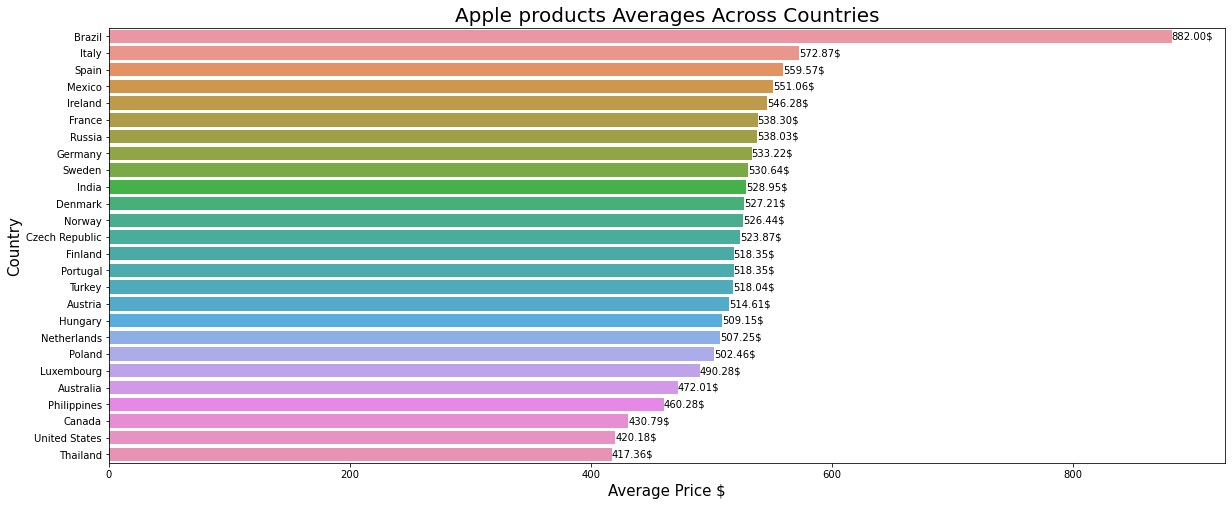

In [46]:
# Plot count of member and casual riders over the months  option 2:
y= list(countries_averages.values)
x_countries = countries_averages.index
plt.figure(figsize=(20,8))
ax= sns.barplot(y, x_countries)
plt.title('Apple products Averages Across Countries', size= 20)
plt.ylabel('Country', size= 15)
plt.xlabel('Average Price $', size= 15)
ax.bar_label(ax.containers[0], fmt='%.2f$')
plt.show()

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


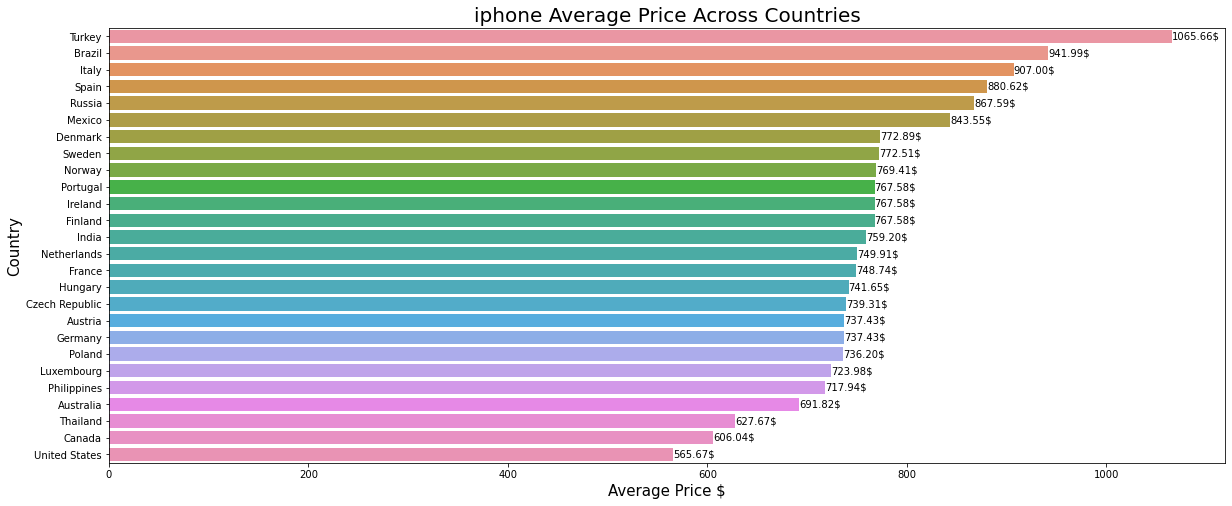

In [47]:
# how much each country pays for iphone? 
y_iphone= iphone_averages.values
x_countries= iphone_averages.index
plt.figure(figsize=(20,8))
ax=sns.barplot( y_iphone,x_countries)
plt.title('iphone Average Price Across Countries', size= 20)
plt.ylabel('Country', size= 15)
plt.xlabel('Average Price $', size= 15)
ax.bar_label(ax.containers[0], fmt='%.2f$')
plt.show()

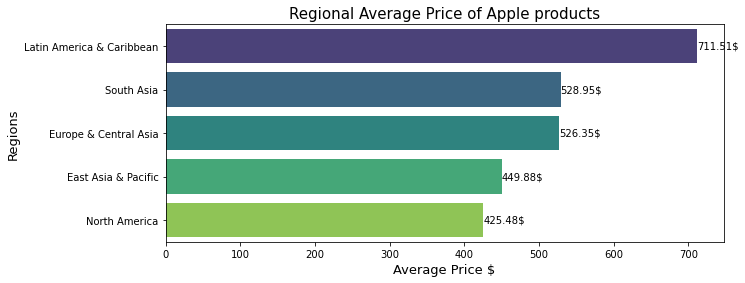

In [48]:
# how much each region pays for apple products? 
y_region= list(regions_averages.values)
x_region = regions_averages.index
plt.figure(figsize=(10,4))
ax= sns.barplot(x= y_region,y=  x_region  ,  palette = 'viridis')
plt.title('Regional Average Price of Apple products', size= 15)
plt.ylabel('Regions', size= 13)
plt.xlabel('Average Price $', size= 13)
ax.bar_label(ax.containers[0], fmt='%.2f$')
plt.show()

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


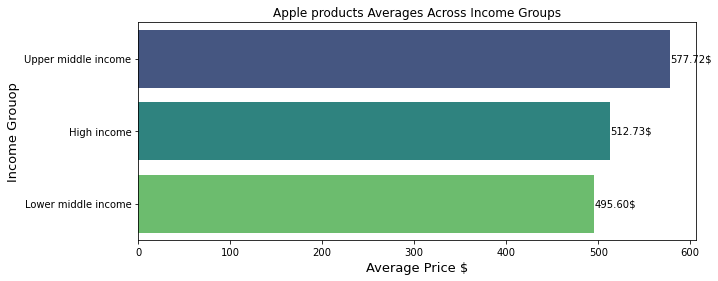

In [49]:
# plot averages of incomes group
x2=incomes.index
y2=incomes.values
plt.figure(figsize=(10,4))
ax= sns.barplot(y2, x2 , palette = 'viridis')
plt.title('Apple products Averages Across Income Groups')
plt.ylabel('Income Grouop', size= 13)
plt.xlabel('Average Price $', size= 13)
ax.bar_label(ax.containers[0], fmt='%.2f$')
plt.show()

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


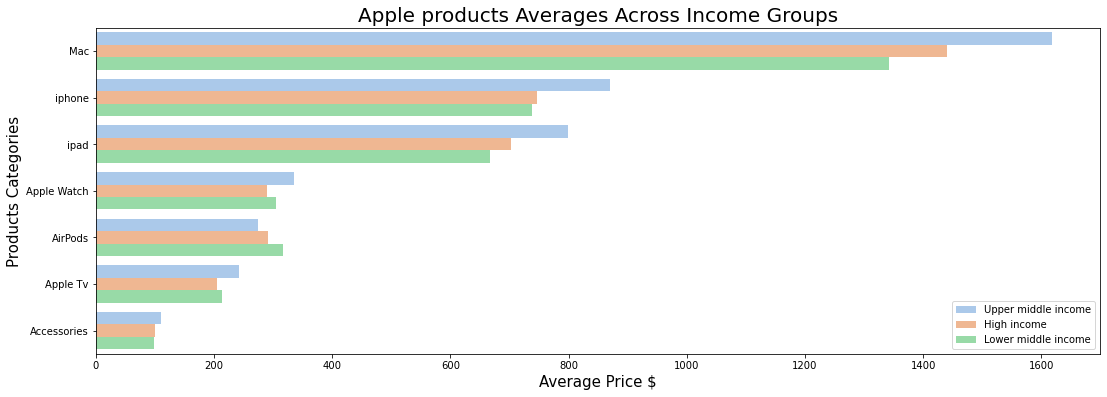

In [50]:
# plot averages of incomes group across products categories
#defines the axises 
y_income_and_groups= list(income_and_groups.values)
x_income_and_groups= []
list_groups=[]
for i,j in income_and_groups.index:
    x_income_and_groups.append(j)
    list_groups.append(str(i)) 
# plt
plt.figure(figsize=(18,6))
ax= sns.barplot(y_income_and_groups, x_income_and_groups , hue= list_groups, palette = 'pastel')
plt.title('Apple products Averages Across Income Groups', size= 20)
plt.ylabel('Products Categories', size= 15)
plt.xlabel('Average Price $', size= 15)
plt.show()

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


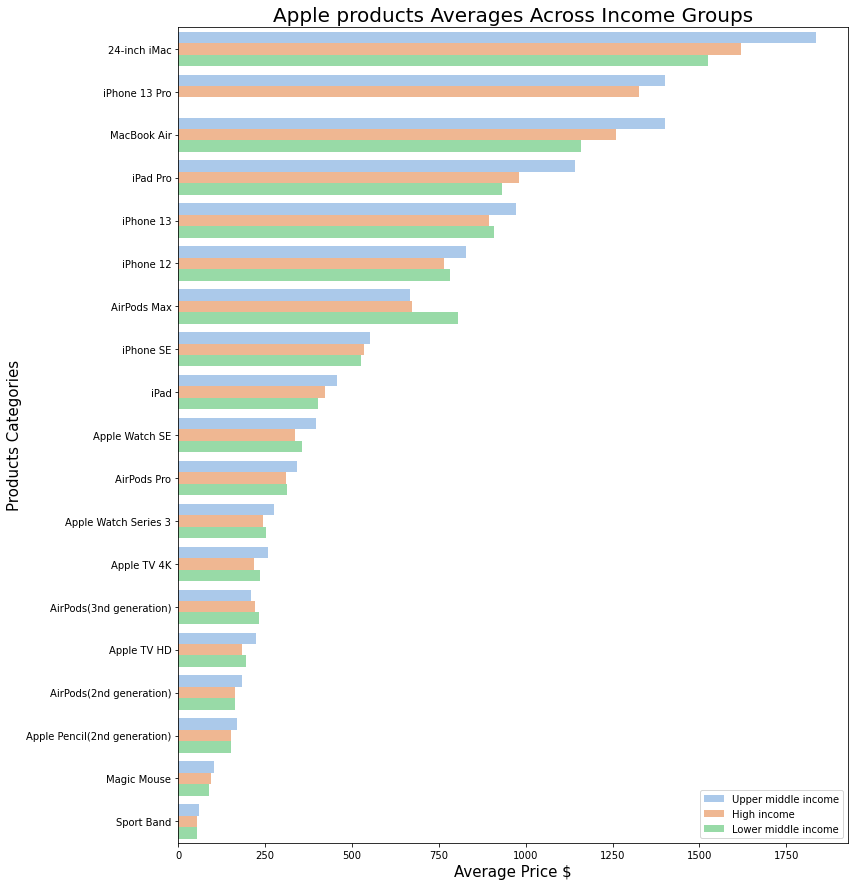

In [51]:
# plot averages of incomes group across models
#defines the axises 
y_models= list(income_and_models.values)
x_models= []
list_models=[]
for i,j in income_and_models.index:
    x_models.append(j)
    list_models.append(str(i))
# plt
plt.figure(figsize=(12,15))
sns.barplot( y_models, x_models, hue= list_models, palette = 'pastel')
plt.title('Apple products Averages Across Income Groups', size= 20)
plt.xlabel('Products Categories', size= 15)
plt.ylabel('Products Categories', size= 15, )
plt.xlabel('Average Price $', size= 15)
#plt.xticks(rotation=90)
plt.show()

### 5) Share

# analysis Question:
### <b>1. What is the average price costumers pay for Apple products within 26 countries?
### <b>2. What is the average price of Apple products in each region?

### <b>3. What is the correlation between the World Bank income group and the product's prices?</b>

- <b>Observing apple products average price across the 26 countries make us wonder about the big differnces between all countries. Brazil in particular, has the highest averag price of Apple products, 882 dollars, comparison to Thailand that stands on 417$ and the United states on 420 dollars. 

- <b>Almost all the products prices are the highest among Upper midlle income countries, this fact isn't obvious, the prices expected to be highest among High income countries.  we discovered also that the Airpods max and Airpods (3rd generation) prices is extremly high particularly in Lower midlle income countries. 

- <b>While analyzing the prices of  products  in Lower midlle income  in comparison to the High income countries, Quite number of products  have a higher price or the same price in Lower income countires such as: Sport Band, Apple Pencil, Airpods (2nd generation), Airpods (3nd generation), Apple TV 4K, Apple Watch Series 3, Airpods Pro, iphone SE, Airpods Max, iphone 12 and iphone 13.  This fact is not obvious, we can assume that Apple will determines a lower/ cheaper prices among Lower midlle income countries, but the data reveals the opposite. 
 
- <b>We can validate this analysis using the graph "Apple products Average Across Income Groups" which demonstrates the average of Upper midlle income countries that stands on 577$ , and the Lower midlle income countries, 495 dollars that is very close to the High income countires, 512 dollars. 

- <b>While analyzing the "Apple products Averages Across Countries" graph, the average products across countries is the highest in Brazil, while the lowest(Cheaper) average price is in the United States as expected and in Thailand and Canada, which is not surprisng. 

- <b>when observing the "Regional Average Price of Apple products" graph, it's very surprising to see the big difference between North America with Average price of  425 dollars which considered High income region and Latin America & Caribbean with average price of 711 dollars which considered Upper middle income region. 